In [396]:
import mlrose_hiive as mlrose
import mlrose.neural as mn
import numpy as np
import random
import time
import itertools
import numpy as np
import pandas 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import f1_score,precision_recall_curve,plot_confusion_matrix,precision_recall_fscore_support,accuracy_score
from matplotlib import pyplot as plt
import tqdm 
import matplotlib.pyplot as plt


In [301]:
MAX_ATTEMPTS = 10
random_state = 42
MAX_ITER = 1000
np.random.seed(random_state)

# Useful Functions 

In [283]:
def minimization_fitness(min_fitness, min_curves):
    offset = np.max(min_curves)
    max_curves = [-x+offset for x in min_curves]
    max_fitness = -min_fitness+offset
    
    return (max_fitness, max_curves)

In [311]:
def RHC(problem,minimization, restarts =0):
    timer = time.time()
    
    best_state, best_fitness, curves = mlrose.random_hill_climb(problem, max_attempts=MAX_ATTEMPTS, max_iters=MAX_ITER, 
                                                                            curve=True, random_state=random_state, restarts=restarts)
    current_time = time.time()

    if minimization: 
        best_fitness, curves = minimization_fitness(best_fitness, curves)
        
    duration = current_time-timer
    print('time taken for model %s'%(duration))
    output = [best_state, best_fitness, curves]
    
    return output, duration

def SA(problem, minimization, init_temp=1.0, decay=0.005, min_temp=0.001):
    timer = time.time()
    best_state, best_fitness, curves = mlrose.simulated_annealing(problem, 
                                                                           schedule=mlrose.ExpDecay(init_temp=init_temp, exp_const=decay, min_temp=min_temp),
                                                                           max_attempts=MAX_ATTEMPTS, max_iters=MAX_ITER, 
                                                                           curve=True, random_state=random_state)
    current_time = time.time()

    if minimization: 
        best_fitness, curves = minimization_fitness(best_fitness, curves)
    duration = current_time-timer
    print('time taken for model %s'%(duration))
    
    return [best_state, best_fitness, curves], duration


def GA(problem,minimization, pop_size=300, mutation_prob=0.1):
    timer = time.time()
    best_state, best_fitness, curves = mlrose.genetic_alg(problem, pop_size=pop_size, mutation_prob=mutation_prob, 
                                                                   max_iters=MAX_ITER, max_attempts=MAX_ATTEMPTS, 
                                                                   curve=True, random_state=random_state)
    current_time = time.time()

    if minimization: 
        best_fitness, curves = minimization_fitness(best_fitness, curves)
    
    duration = current_time-timer
    print('time taken for model %s'%(duration))
    output = [best_state, best_fitness, curves]
    return output, duration

    
def MIMIC(problem,minimization, pop_size=300, keep_pct=0.3):
    timer = time.time()
    best_state, best_fitness, curves = mlrose.mimic(problem, pop_size=pop_size, keep_pct=keep_pct, 
                                                             max_attempts=MAX_ATTEMPTS, max_iters=MAX_ITER, 
                                                             curve=True, random_state=random_state)
    current_time = time.time()

    if minimization: 
        best_fitness, curves = minimization_fitness(best_fitness, curves)
        
    duration = current_time-timer
    print('time taken for model %s'%(duration))
    output = [best_state, best_fitness, curves]
    return output, duration

In [285]:
def rand_opt(alg_name,minimization, problem, param1, param2):
    if alg_name =='SA':
        return SA(problem,minimization , init_temp=param2, decay=param1)
    if alg_name == 'MIMIC':
        return MIMIC(problem,minimization, pop_size=param1, keep_pct=param2)
    if alg_name == 'GA':
        return GA(problem,minimization, pop_size=param1, mutation_prob=param2)

In [286]:
def gridsearch(parameters_list, problem,alg_name, param1_name, param2_name,minimization=False):
    list_history = []          
    for param1 in parameters_list[0]:
            for param2 in parameters_list[1]:
                print("Computing %s for %s=%s and %s=%s..."%(alg_name,param1_name,"{:.2f}".format(param1),param2_name,"{:.2f}".format(param2)))
                
                output,duration = rand_opt(alg_name,minimization, problem, param1, param2)
                print("best score:",output[1])
                                           
                list_history.append((param1, param2 , output))

    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    ax.set_title('Gridsearch %s'%(alg_name))

    for param1, param2, output in list_history:
        curves = output[2]
        ax.plot(np.arange(len(curves)), curves, label="%s=%s|%s=%s"%(param1_name,param1,param2_name,param2))

    ax.legend()

    plt.show()

# Defining the problems

## Traveling salesperson

In [294]:
def gen_distances(n_points):
        dist_list = []
        for i in range(n_points):
            for j in range(n_points):
                if j<i:
                    dist_list.append((i,j,random.randint(1,200)/10))        
        return dist_list

In [334]:
l = 30
dist_list = gen_distances(l)

fitness_coords = mlrose.TravellingSales(distances = dist_list)
problem_fit = mlrose.TSPOpt(length = l, fitness_fn = fitness_coords, maximize=False)


Computing SA for decay=0.80 and initial temparture=50.00...
time taken for model 0.09038305282592773
best score: -381.99999999999994
Computing SA for decay=0.80 and initial temparture=10.00...
time taken for model 0.11861419677734375
best score: -331.0
Computing SA for decay=0.80 and initial temparture=5.00...
time taken for model 0.11916112899780273
best score: -331.0
Computing SA for decay=0.05 and initial temparture=50.00...
time taken for model 0.2225944995880127
best score: -270.79999999999995
Computing SA for decay=0.05 and initial temparture=10.00...
time taken for model 0.13280105590820312
best score: -336.19999999999993
Computing SA for decay=0.05 and initial temparture=5.00...
time taken for model 0.06943798065185547
best score: -405.2
Computing SA for decay=0.01 and initial temparture=50.00...
time taken for model 0.7714288234710693
best score: -268.6
Computing SA for decay=0.01 and initial temparture=10.00...
time taken for model 0.2320387363433838
best score: -375.5
Comput

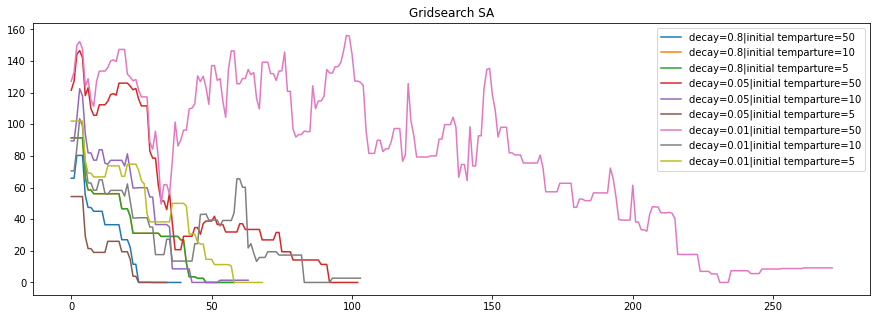

In [298]:
gridsearch([[0.8, 0.05, 0.01],[ 50,10,5]], problem_fit,'SA', 'decay', 'initial temparture',minimization=True)

Computing SA for decay=0.80 and initial temparture=50.00...
time taken for model 0.10043048858642578
best score: 83.40000000000003
Computing SA for decay=0.80 and initial temparture=10.00...
time taken for model 0.05981040000915527
best score: 64.60000000000002
Computing SA for decay=0.80 and initial temparture=5.00...
time taken for model 0.0607762336730957
best score: 64.60000000000002
Computing SA for decay=0.05 and initial temparture=50.00...
time taken for model 0.19927549362182617
best score: 167.69999999999987
Computing SA for decay=0.05 and initial temparture=10.00...
time taken for model 0.14746427536010742
best score: 151.89999999999998
Computing SA for decay=0.05 and initial temparture=5.00...
time taken for model 0.15084028244018555
best score: 151.89999999999998
Computing SA for decay=0.01 and initial temparture=50.00...
time taken for model 0.6838393211364746
best score: 276.9000000000001
Computing SA for decay=0.01 and initial temparture=10.00...
time taken for model 0.2

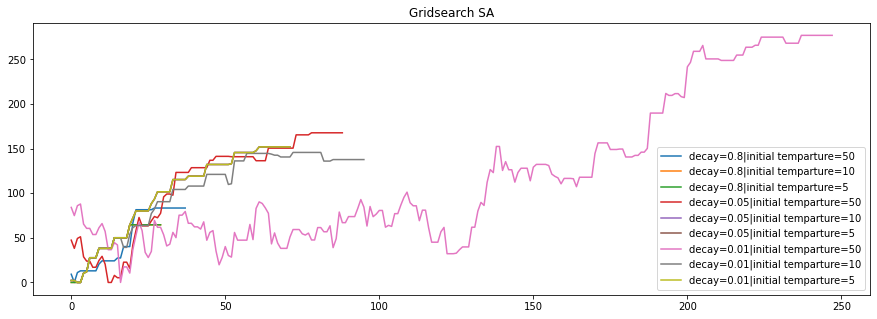

In [303]:
gridsearch([[0.8, 0.05, 0.01],[ 50,10,5]], problem_fit,'SA', 'decay', 'initial temparture',minimization=True)

time taken for model 0.10411596298217773
time taken for model 0.1303246021270752
time taken for model 0.3998897075653076
time taken for model 1.132007360458374
time taken for model 1.3448591232299805
time taken for model 1.5516209602355957


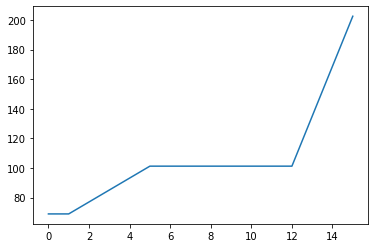

In [338]:
R = []
resets =[0,1,5,10,12,15]
for r in resets:
    rhc = RHC(problem_fit,True,r)
    R.append([rhc[0][1]])
plt.plot(resets,R)

Computing SA for decay=0.80 and initial temparture=50.00...
time taken for model 0.08467531204223633
best score: 121.39999999999998
Computing SA for decay=0.80 and initial temparture=10.00...
time taken for model 0.0740823745727539
best score: 121.39999999999998
Computing SA for decay=0.80 and initial temparture=5.00...
time taken for model 0.07694005966186523
best score: 121.39999999999998
Computing SA for decay=0.05 and initial temparture=50.00...
time taken for model 0.2267017364501953
best score: 141.29999999999995
Computing SA for decay=0.05 and initial temparture=10.00...
time taken for model 0.0848534107208252
best score: 115.69999999999993
Computing SA for decay=0.05 and initial temparture=5.00...
time taken for model 0.09690427780151367
best score: 116.00000000000006
Computing SA for decay=0.01 and initial temparture=50.00...
time taken for model 0.7293317317962646
best score: 264.8999999999999
Computing SA for decay=0.01 and initial temparture=10.00...
time taken for model 0.

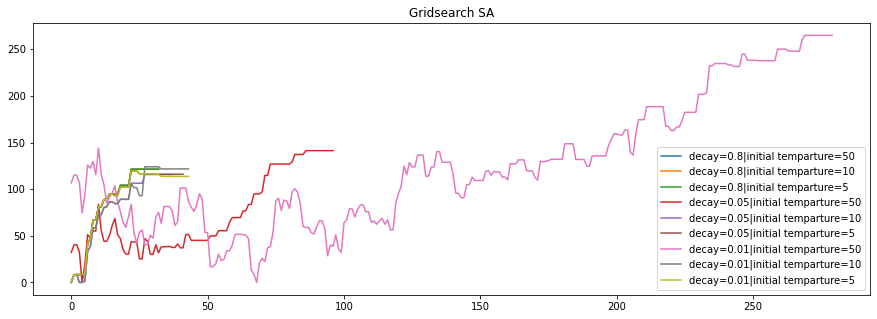

In [101]:
gridsearch([[0.8, 0.05, 0.01],[ 50,10,5]], problem_fit,'SA', 'decay', 'initial temparture',minimization=True)

Computing GA for pop size=100.00 and mutation proba=0.10...
time taken for model 26.9024875164032
best score: 240.29999999999995
Computing GA for pop size=100.00 and mutation proba=0.60...
time taken for model 13.452573776245117
best score: 223.29999999999998
Computing GA for pop size=200.00 and mutation proba=0.10...
time taken for model 24.216243505477905
best score: 249.59999999999997
Computing GA for pop size=200.00 and mutation proba=0.60...
time taken for model 26.664721250534058
best score: 256.5
Computing GA for pop size=500.00 and mutation proba=0.10...
time taken for model 81.54997849464417
best score: 262.2
Computing GA for pop size=500.00 and mutation proba=0.60...
time taken for model 90.77610182762146
best score: 229.49999999999997


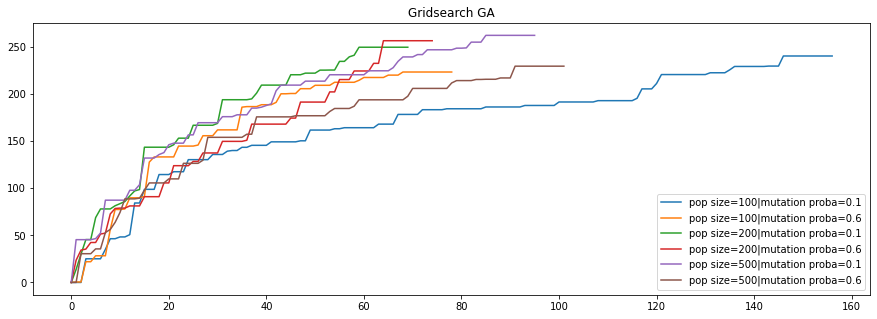

In [102]:
gridsearch([[100, 200, 500],[ 0.1,0.6]], problem_fit,'GA', 'pop size', 'mutation proba',minimization=True)

Computing MIMIC for pop size=50.00 and keep pct=0.20...
time taken for model 10.860266208648682
best score: 0.0
Computing MIMIC for pop size=50.00 and keep pct=0.70...
time taken for model 11.08886194229126
best score: 0.0
Computing MIMIC for pop size=150.00 and keep pct=0.20...
time taken for model 15.508478879928589
best score: 0.0
Computing MIMIC for pop size=150.00 and keep pct=0.70...
time taken for model 41.873172998428345
best score: 59.19999999999999
Computing MIMIC for pop size=600.00 and keep pct=0.20...
time taken for model 53.31223917007446
best score: 88.90000000000003
Computing MIMIC for pop size=600.00 and keep pct=0.70...
time taken for model 55.189101696014404
best score: 34.400000000000034


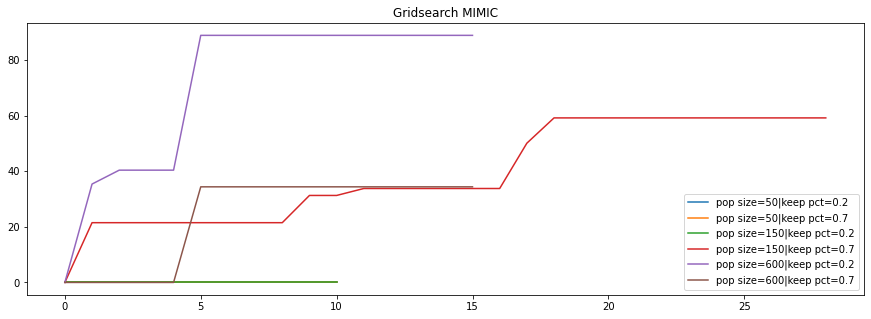

In [103]:
gridsearch([[50, 150, 600],[ 0.2,0.7]], problem_fit,'MIMIC', 'pop size', 'keep pct',minimization=True)

In [306]:
rhc_time = []
rhc_score = []
sa_time = []
ga_time = []
sa_score = []
ga_score = []
mimic_time = []
mimic_score = []

range_size = range(10,35,5)
for l in range_size:
    dist_list = gen_distances(l)
    fitness_coords = mlrose.TravellingSales(distances = dist_list)
    problem_fit = mlrose.TSPOpt(length = l, fitness_fn = fitness_coords, maximize=False)
    
    sa = SA(problem_fit,True,50,0.01)
    sa_score.append(sa[0][1])
    sa_time.append(sa[1])
    
    rhc = RHC(problem_fit,True)
    rhc_time.append(rhc[1])
    rhc_score.append(rhc[0][1])
    
    ga = GA(problem_fit,True,500,0.1)
    ga_time.append(ga[1])
    ga_score.append(ga[0][1])
    
    mimic = MIMIC(problem_fit,False,600,0.2)
    mimic_time.append(mimic[1])
    mimic_score.append(mimic[0][1])

time taken for model 0.49239253997802734
time taken for model 0.04507017135620117
time taken for model 15.231677532196045
time taken for model 17.896751880645752
time taken for model 0.6504764556884766
time taken for model 0.08995747566223145
time taken for model 29.784821033477783
time taken for model 24.220300436019897
time taken for model 0.5943944454193115
time taken for model 0.07962799072265625
time taken for model 23.982123613357544
time taken for model 27.127458333969116
time taken for model 0.49395084381103516
time taken for model 0.03218674659729004
time taken for model 41.204511880874634
time taken for model 30.030011892318726
time taken for model 0.741769552230835
time taken for model 0.04752755165100098
time taken for model 50.62503695487976
time taken for model 45.206804513931274


In [292]:
sa_score

[-87.30000000000001,
 -105.79999999999998,
 -203.7,
 -260.20000000000005,
 -284.2,
 -450.90000000000003]

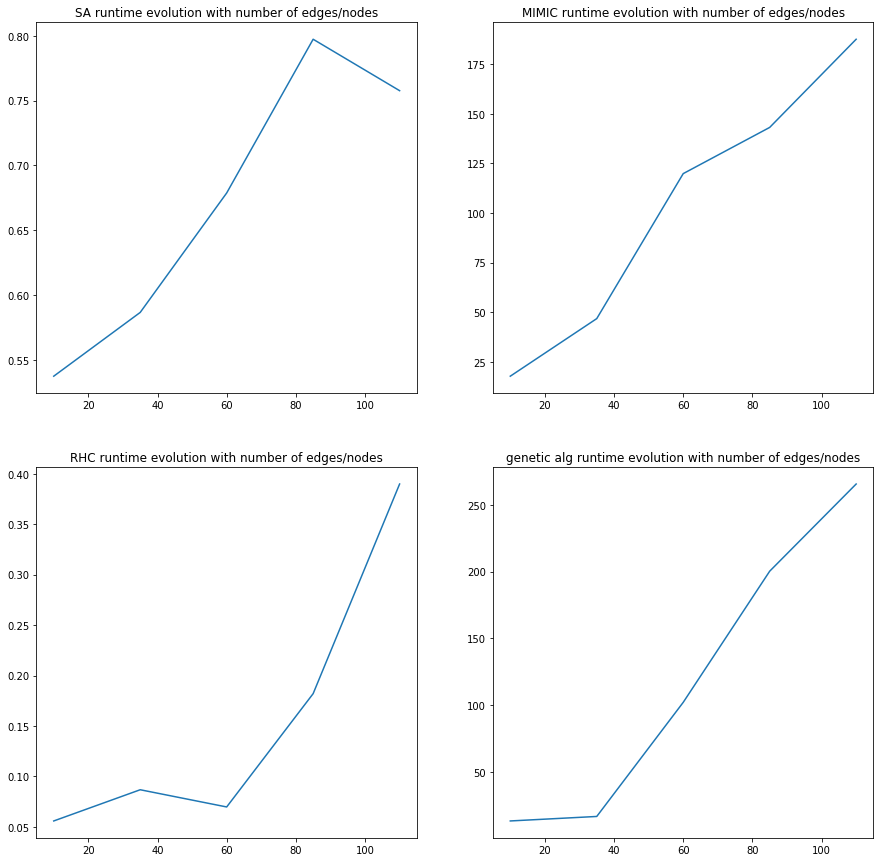

In [105]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(range_size, sa_time)
ax[0,0].set_title('SA runtime evolution with number of edges/nodes')
ax[1,0].plot(range_size, rhc_time)
ax[1,0].set_title('RHC runtime evolution with number of edges/nodes')
ax[0,1].plot(range_size, mimic_time)
ax[0,1].set_title('MIMIC runtime evolution with number of edges/nodes')
ax[1,1].plot(range_size, ga_time)
ax[1,1].set_title('genetic alg runtime evolution with number of edges/nodes')
plt.show()

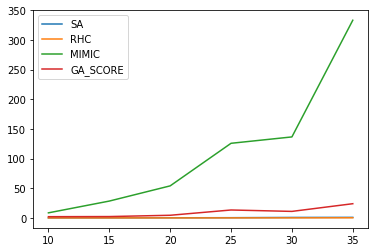

In [290]:
plt.plot(range_size, sa_time)
plt.plot(range_size, rhc_time)
plt.plot(range_size, mimic_time)
plt.plot(range_size, ga_time)
plt.legend(['SA','RHC','MIMIC','GA_SCORE'])

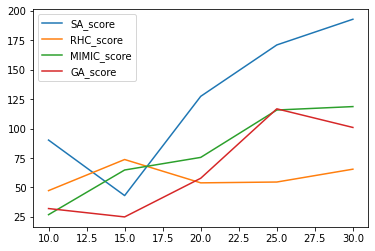

In [339]:
plt.plot(range_size, sa_score)
plt.plot(range_size, rhc_score)
plt.plot(range_size, mimic_score)
plt.plot(range_size, ga_score)
plt.legend(['SA_score','RHC_score','MIMIC_score','GA_score'])

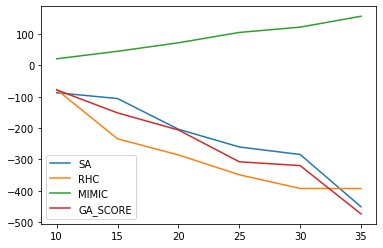

In [291]:
plt.plot(range_size, sa_score)
plt.plot(range_size, rhc_score)
plt.plot(range_size, mimic_score)
plt.plot(range_size, ga_score)
plt.legend(['SA','RHC','MIMIC','GA_SCORE'])

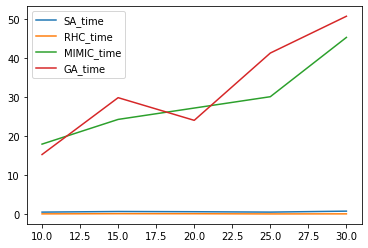

In [340]:
plt.plot(range_size, sa_time)
plt.plot(range_size, rhc_time)
plt.plot(range_size, mimic_time)
plt.plot(range_size, ga_time)
plt.legend(['SA_time','RHC_time','MIMIC_time','GA_time'])

## K-color problem

In [318]:
def generate_edges(nodes,n_edges):
    edges = []
    while len(edges)<n_edges:
        edge = (random.randint(0,n_edges),random.randint(0,n_edges))
        if (edge[0] != edge[1]) and (edge not in edges) and ((edge[1],edge[0]) not in edges):
            edges.append(edge)
    return edges

In [321]:
edges = generate_edges(15,50)
fitness_color = mlrose.MaxKColor(edges)
problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness_color, maximize=True, max_val=2)

time taken for model 0.0016884803771972656
time taken for model 0.0027222633361816406
time taken for model 0.005537986755371094
time taken for model 0.013608455657958984


Text(0.5, 1.0, 'RHC gridsearch')

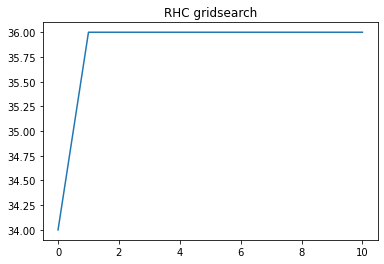

In [325]:
R = []
resets =[0,1,5,10]
for r in resets:
    rhc = RHC(problem_fit,False,r)
    R.append([rhc[0][1]])
plt.plot(resets,R)
plt.title('RHC gridsearch')

Computing SA for decay=0.80 and initial temparture=50.00...
time taken for model 0.0052032470703125
best score: 44.0
Computing SA for decay=0.80 and initial temparture=10.00...
time taken for model 0.006336212158203125
best score: 44.0
Computing SA for decay=0.80 and initial temparture=5.00...
time taken for model 0.006177425384521484
best score: 44.0
Computing SA for decay=0.05 and initial temparture=50.00...
time taken for model 0.006572246551513672
best score: 39.0
Computing SA for decay=0.05 and initial temparture=10.00...
time taken for model 0.007988691329956055
best score: 39.0
Computing SA for decay=0.05 and initial temparture=5.00...
time taken for model 0.007942438125610352
best score: 41.0
Computing SA for decay=0.01 and initial temparture=50.00...
time taken for model 0.028504133224487305
best score: 44.0
Computing SA for decay=0.01 and initial temparture=10.00...
time taken for model 0.01620626449584961
best score: 42.0
Computing SA for decay=0.01 and initial temparture=5.

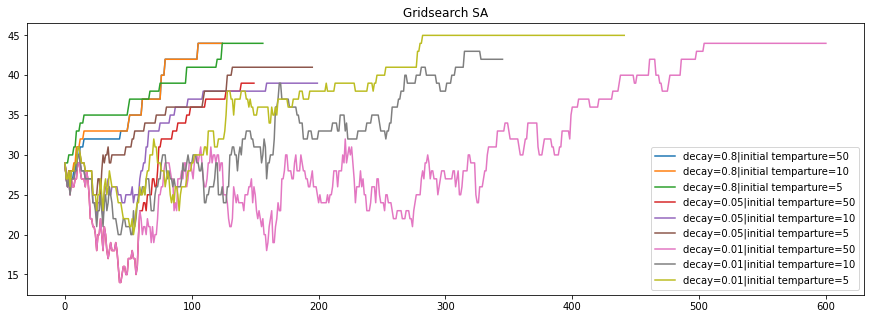

In [57]:
gridsearch([[0.8, 0.05, 0.01],[ 50,10,5]], problem_fit,'SA', 'decay', 'initial temparture',minimization=False)

Computing GA for pop size=100.00 and mutation proba=0.10...
time taken for model 0.35862255096435547
best score: 49.0
Computing GA for pop size=100.00 and mutation proba=0.60...
time taken for model 0.44179415702819824
best score: 50.0
Computing GA for pop size=200.00 and mutation proba=0.10...
time taken for model 0.6084473133087158
best score: 48.0
Computing GA for pop size=200.00 and mutation proba=0.60...
time taken for model 0.7207372188568115
best score: 50.0
Computing GA for pop size=500.00 and mutation proba=0.10...
time taken for model 1.8198697566986084
best score: 50.0
Computing GA for pop size=500.00 and mutation proba=0.60...
time taken for model 1.440072774887085
best score: 50.0


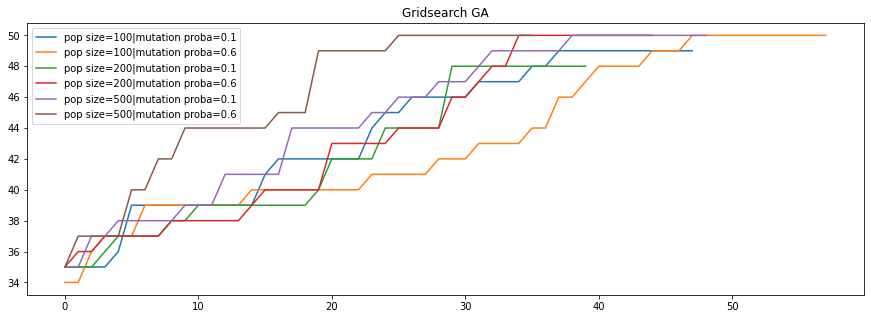

In [61]:
gridsearch([[100, 200, 500],[ 0.1,0.6]], problem_fit,'GA', 'pop size', 'mutation proba',minimization=False)

Computing MIMIC for pop size=50.00 and keep pct=0.20...
time taken for model 10.906301259994507
best score: 40.0
Computing MIMIC for pop size=50.00 and keep pct=0.70...
time taken for model 26.726441383361816
best score: 43.0
Computing MIMIC for pop size=150.00 and keep pct=0.20...
time taken for model 12.643830299377441
best score: 47.0
Computing MIMIC for pop size=150.00 and keep pct=0.70...
time taken for model 25.720326900482178
best score: 47.0
Computing MIMIC for pop size=600.00 and keep pct=0.20...
time taken for model 13.314602613449097
best score: 50.0
Computing MIMIC for pop size=600.00 and keep pct=0.70...
time taken for model 26.3997585773468
best score: 50.0


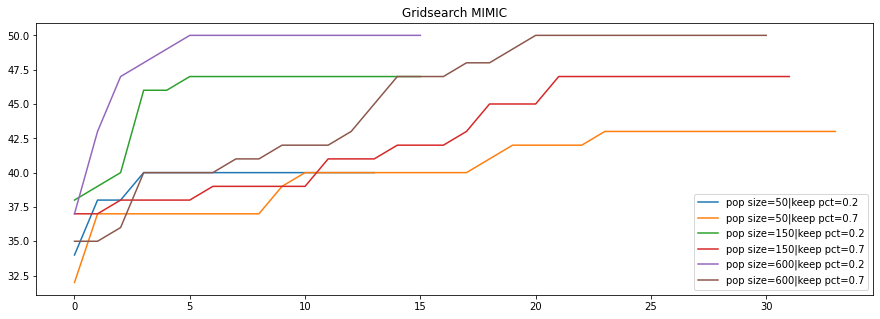

In [59]:
gridsearch([[50, 150, 600],[ 0.2,0.7]], problem_fit,'MIMIC', 'pop size', 'keep pct',minimization=Falsez)

In [68]:
rhc_time = []
rhc_score = []
sa_time = []
ga_time = []
sa_score = []
ga_score = []
mimic_time = []
mimic_score = []

range_kcolor = range(10,150,20)
for l in range_kcolor:
    edges = generate_edges(l,3*l)
    fitness_color = mlrose.MaxKColor(edges)
    problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness_color, maximize=True, max_val=2)
    
    sa = SA(problem_fit,False,5,0.8)
    sa_score.append(sa[0][1])
    sa_time.append(sa[1])
    
    rhc = RHC(problem_fit,False)
    rhc_time.append(rhc[1])
    rhc_score.append(rhc[0][1])
    
    ga = GA(problem_fit,False,200,0.6)
    ga_time.append(ga[1])
    ga_score.append(ga[0][1])
    
    mimic = MIMIC(problem_fit,False,600,0.2)
    mimic_time.append(mimic[1])
    mimic_score.append(mimic[0][1])

time taken for model 0.0020172595977783203
time taken for model 0.0010826587677001953
time taken for model 0.36511754989624023
time taken for model 4.220316171646118
time taken for model 0.005376338958740234
time taken for model 0.0023560523986816406
time taken for model 1.3286316394805908
time taken for model 60.9919958114624
time taken for model 0.01296544075012207
time taken for model 0.0039670467376708984
time taken for model 2.3740923404693604
time taken for model 209.26689171791077
time taken for model 0.03959369659423828
time taken for model 0.005518913269042969
time taken for model 3.407616376876831
time taken for model 454.69141125679016
time taken for model 0.024656057357788086
time taken for model 0.011405229568481445
time taken for model 0.7033672332763672
time taken for model 851.8829896450043
time taken for model 0.06847977638244629
time taken for model 0.008074283599853516
time taken for model 1.349872350692749
time taken for model 1430.4019467830658
time taken for model

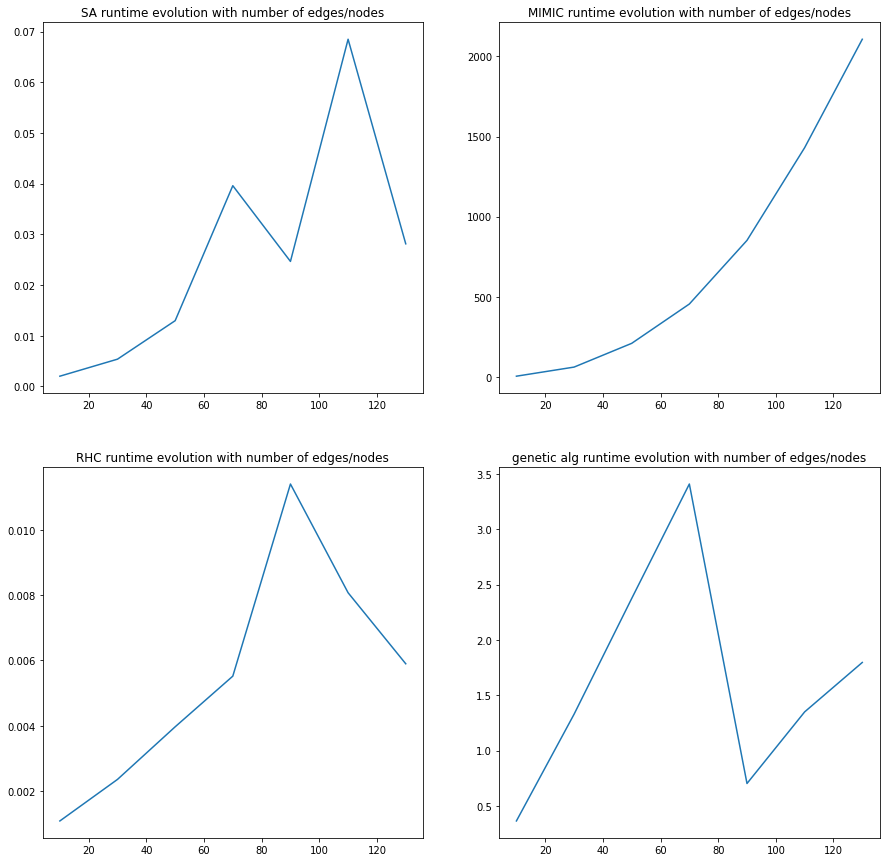

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(range_kcolor, sa_time)
ax[0,0].set_title('SA runtime evolution with number of edges/nodes')
ax[1,0].plot(range_kcolor, rhc_time)
ax[1,0].set_title('RHC runtime evolution with number of edges/nodes')
ax[0,1].plot(range_kcolor, mimic_time)
ax[0,1].set_title('MIMIC runtime evolution with number of edges/nodes')
ax[1,1].plot(range_kcolor, ga_time)
ax[1,1].set_title('genetic alg runtime evolution with number of edges/nodes')
plt.show()

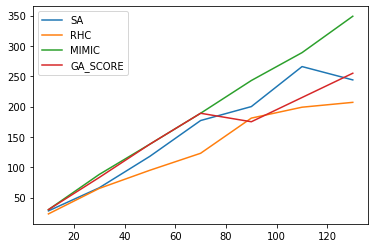

In [82]:
plt.plot(range_kcolor, sa_score)
plt.plot(range_kcolor, rhc_score)
plt.plot(range_kcolor, mimic_score)
plt.plot(range_kcolor, ga_score)
plt.legend(['SA','RHC','MIMIC','GA_SCORE'])

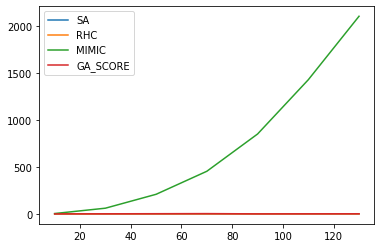

In [83]:
plt.plot(range_kcolor, sa_time)
plt.plot(range_kcolor, rhc_time)
plt.plot(range_kcolor, mimic_time)
plt.plot(range_kcolor, ga_time)
plt.legend(['SA','RHC','MIMIC','GA_SCORE'])

## 4 peaks

In [341]:
def four_peaks(t_pct=0.1, size=15):
    # Initialize fitness function
    fitness_4peaks = mlrose.FourPeaks(t_pct=t_pct)

    # Define optimization problem object
    problem_fit = mlrose.DiscreteOpt(length=size, fitness_fn=fitness_4peaks, maximize=True)

    return problem_fit

In [342]:
problem_fit = four_peaks()

time taken for model 0.001068115234375
time taken for model 0.0018553733825683594
time taken for model 0.0018548965454101562
time taken for model 0.0010998249053955078
time taken for model 0.0018563270568847656
time taken for model 0.0026900768280029297
time taken for model 0.0045986175537109375
time taken for model 0.00470733642578125
time taken for model 0.008547782897949219
time taken for model 0.011347293853759766


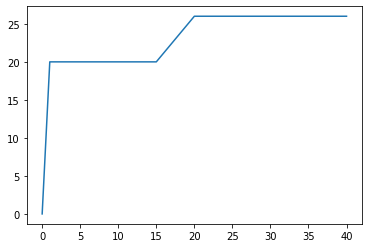

In [332]:
R = []
resets =[0,1,2,4,5,10,15,20,25,40]
for r in resets:
    rhc = RHC(problem_fit,False,r)
    R.append([rhc[0][1]])
plt.plot(resets,R)

Computing SA for decay=0.80 and initial temparture=50.00...
time taken for model 0.008058547973632812
best score: 26.0
Computing SA for decay=0.80 and initial temparture=10.00...
time taken for model 0.002769947052001953
best score: 26.0
Computing SA for decay=0.80 and initial temparture=5.00...
time taken for model 0.001668691635131836
best score: 26.0
Computing SA for decay=0.05 and initial temparture=50.00...
time taken for model 0.004559993743896484
best score: 9.0
Computing SA for decay=0.05 and initial temparture=10.00...
time taken for model 0.0034198760986328125
best score: 26.0
Computing SA for decay=0.05 and initial temparture=5.00...
time taken for model 0.002950429916381836
best score: 12.0
Computing SA for decay=0.01 and initial temparture=50.00...
time taken for model 0.007195472717285156
best score: 14.0
Computing SA for decay=0.01 and initial temparture=10.00...
time taken for model 0.010579586029052734
best score: 26.0
Computing SA for decay=0.01 and initial temparture

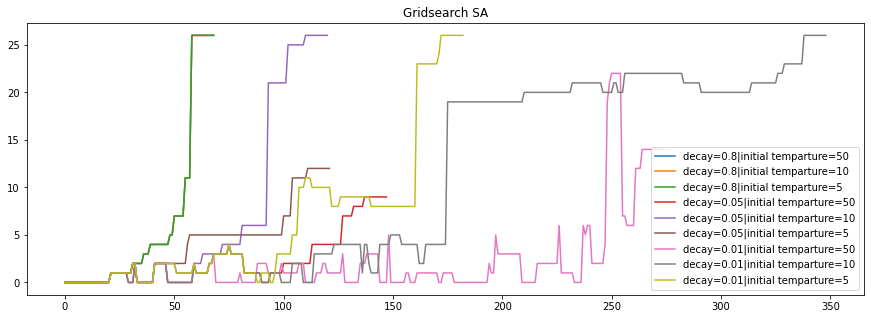

In [92]:
gridsearch([[0.8, 0.05, 0.01],[ 50,10,5]], problem_fit,'SA', 'decay', 'initial temparture',minimization=False)

Computing GA for pop size=100.00 and mutation proba=0.10...
time taken for model 0.10404062271118164
best score: 27.0
Computing GA for pop size=100.00 and mutation proba=0.60...
time taken for model 0.10689806938171387
best score: 27.0
Computing GA for pop size=200.00 and mutation proba=0.10...
time taken for model 0.1662755012512207
best score: 27.0
Computing GA for pop size=200.00 and mutation proba=0.60...
time taken for model 0.17542552947998047
best score: 27.0
Computing GA for pop size=500.00 and mutation proba=0.10...
time taken for model 0.40093517303466797
best score: 27.0
Computing GA for pop size=500.00 and mutation proba=0.60...
time taken for model 0.39111828804016113
best score: 27.0


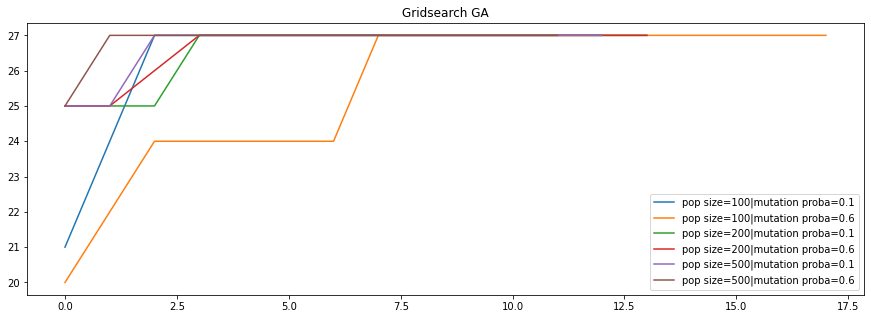

In [93]:
gridsearch([[100, 200, 500],[ 0.1,0.6]], problem_fit,'GA', 'pop size', 'mutation proba',minimization=False)

Computing MIMIC for pop size=50.00 and keep pct=0.20...
time taken for model 0.7883660793304443
best score: 9.0
Computing MIMIC for pop size=50.00 and keep pct=0.70...
time taken for model 0.7752318382263184
best score: 23.0
Computing MIMIC for pop size=150.00 and keep pct=0.20...
time taken for model 0.9234926700592041
best score: 27.0
Computing MIMIC for pop size=150.00 and keep pct=0.70...
time taken for model 1.0034494400024414
best score: 21.0
Computing MIMIC for pop size=600.00 and keep pct=0.20...
time taken for model 0.8993704319000244
best score: 27.0
Computing MIMIC for pop size=600.00 and keep pct=0.70...
time taken for model 1.624220371246338
best score: 27.0


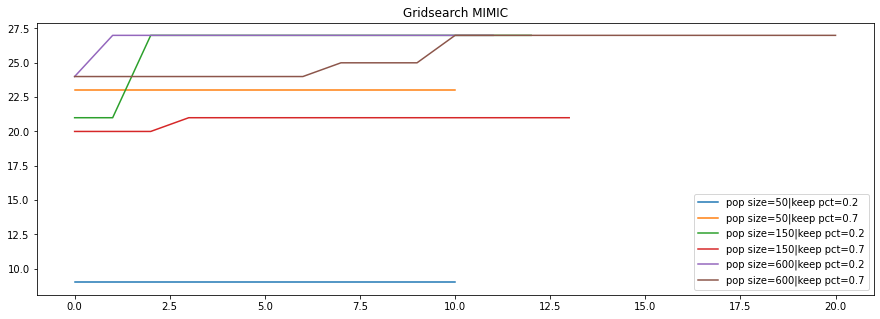

In [95]:
gridsearch([[50, 150, 600],[ 0.2,0.7]], problem_fit,'MIMIC', 'pop size', 'keep pct',minimization=False)

In [343]:
rhc_time = []
rhc_score = []
sa_time = []
ga_time = []
sa_score = []
ga_score = []
mimic_time = []
mimic_score = []

range_size = range(10,150,25)
for l in range_size:
    problem_fit = four_peaks(size=l)
    
    sa = SA(problem_fit,False,10,0.8)
    sa_score.append(sa[0][1])
    sa_time.append(sa[1])
    
    rhc = RHC(problem_fit,False)
    rhc_time.append(rhc[1])
    rhc_score.append(rhc[0][1])
    
    ga = GA(problem_fit,False,500,0.1)
    ga_time.append(ga[1])
    ga_score.append(ga[0][1])
    
    mimic = MIMIC(problem_fit,False,600,0.2)
    mimic_time.append(mimic[1])
    mimic_score.append(mimic[0][1])

time taken for model 0.002639293670654297
time taken for model 0.0002522468566894531
time taken for model 0.32688307762145996
time taken for model 0.38941431045532227
time taken for model 0.007788181304931641
time taken for model 0.00018668174743652344
time taken for model 1.7395586967468262
time taken for model 11.90678095817566
time taken for model 0.029668092727661133
time taken for model 0.00020456314086914062
time taken for model 2.517566204071045
time taken for model 32.02712821960449
time taken for model 0.03275871276855469
time taken for model 0.0002014636993408203
time taken for model 1.3059985637664795
time taken for model 63.71379780769348
time taken for model 0.029367685317993164
time taken for model 0.0003952980041503906
time taken for model 0.8651323318481445
time taken for model 175.66949582099915
time taken for model 0.03390336036682129
time taken for model 0.0002894401550292969
time taken for model 4.751824617385864
time taken for model 157.74061131477356


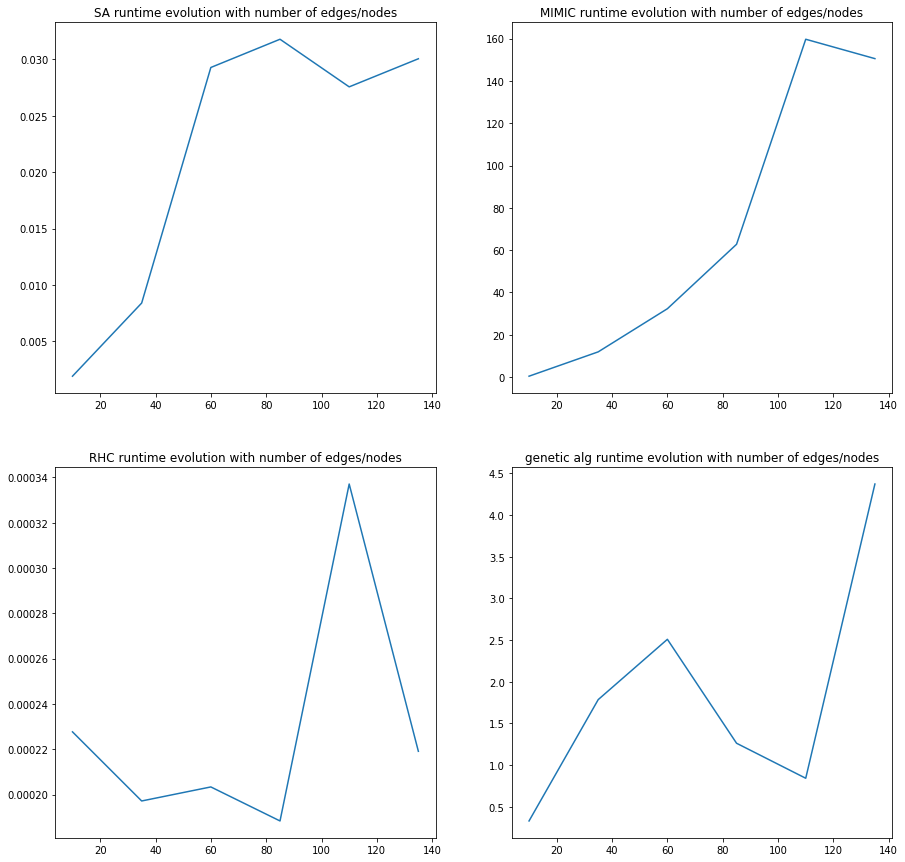

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(range_size, sa_time)
ax[0,0].set_title('SA runtime evolution with number of edges/nodes')
ax[1,0].plot(range_size, rhc_time)
ax[1,0].set_title('RHC runtime evolution with number of edges/nodes')
ax[0,1].plot(range_size, mimic_time)
ax[0,1].set_title('MIMIC runtime evolution with number of edges/nodes')
ax[1,1].plot(range_size, ga_time)
ax[1,1].set_title('genetic alg runtime evolution with number of edges/nodes')
plt.show()

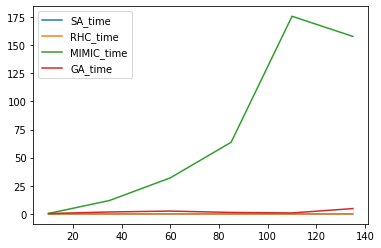

In [345]:
plt.plot(range_size, sa_time)
plt.plot(range_size, rhc_time)
plt.plot(range_size, mimic_time)
plt.plot(range_size, ga_time)
plt.legend(['SA_time','RHC_time','MIMIC_time','GA_time'])

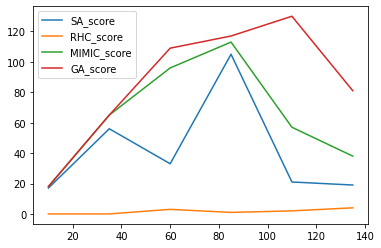

In [344]:
plt.plot(range_size, sa_score)
plt.plot(range_size, rhc_score)
plt.plot(range_size, mimic_score)
plt.plot(range_size, ga_score)
plt.legend(['SA_score','RHC_score','MIMIC_score','GA_score'])

# Neural Net Weights Random Optimization

In [101]:
#loading previous dataset

DS1 = pandas.read_csv('liver_patient.csv', delimiter=',')
DS1.loc[DS1['Gender']=='Male','Gender']=1
DS1.loc[DS1['Gender']=='Female','Gender']=0
DS1 = DS1.dropna()
DS1_arr = DS1.values
X1,y1 = DS1_arr[:,:-1],DS1_arr[:,-1]
y1 -= 1
X1 =X1.astype('float')
y1=y1.astype('int')

In [228]:
clf = MLPClassifier((20),'relu',learning_rate='adaptive')
clf.fit(np.repeat(X1_train,2,axis=0),np.repeat(y1_train,2))
y1_pred = clf.predict(X1_test)
train_pred =  clf.predict(X1_train)

print('accuracy train:',accuracy_score(train_pred,y1_train))
print('accuracy test:',accuracy_score(y1_pred,y1_test))
print('f1score train:',f1_score(train_pred,y1_train))
print('f1score test:',f1_score(y1_pred,y1_test))

accuracy train: 0.755939524838013
accuracy test: 0.7413793103448276
f1score train: 0.5232067510548523
f1score test: 0.4444444444444445


train acc 0.6285097192224622
test acc 0.6293103448275862
train f1 0.34351145038167935
test f1 0.2181818181818182


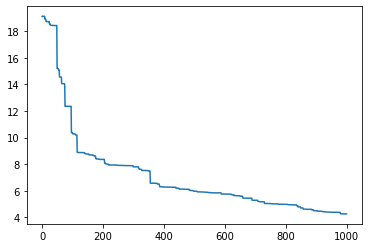

In [388]:
a1 = mlrose.NeuralNetwork(hidden_nodes=[20],activation='relu',schedule=mlrose.ExpDecay(20, 0.5),early_stopping=True,algorithm='simulated_annealing',max_iters=1000, max_attempts= 100 ,curve=True)
a1.fit(X1_train,y1_train)
print('train acc',accuracy_score(a1.predict(X1_train),y1_train))
print('test acc',accuracy_score(a1.predict(X1_test),y1_test))
print('train f1',f1_score(a1.predict(X1_train),y1_train))
print('test f1',f1_score(a1.predict(X1_test),y1_test))
plt.plot(np.arange(len(a1.fitness_curve)),(a1.fitness_curve))

train f1 0.6501079913606912
test f1 0.7241379310344828
train f1 0.4087591240875912
test f1 0.5


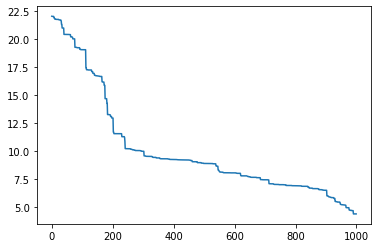

In [386]:
a2 = mlrose.NeuralNetwork(hidden_nodes=[20],activation='relu',early_stopping=True,algorithm='random_hill_climb',max_iters=1000, max_attempts= 100 ,curve=True,restarts = 1)
a2.fit(X1_train,y1_train)
print('train f1',accuracy_score(a2.predict(X1_train),y1_train))
print('test f1',accuracy_score(a2.predict(X1_test),y1_test))
print('train f1',f1_score(a2.predict(X1_train),y1_train))
print('test f1',f1_score(a2.predict(X1_test),y1_test))
plt.plot(np.arange(len(a2.fitness_curve)),(a2.fitness_curve))

train f1 0.7235421166306696
test f1 0.75
train f1 0.2558139534883721
test f1 0.17142857142857143


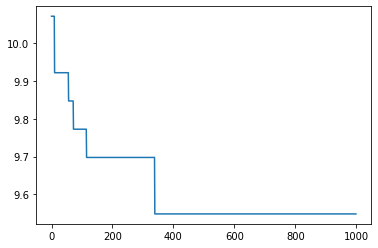

In [395]:
a = mlrose.NeuralNetwork(hidden_nodes=[20],activation='relu',early_stopping=True,algorithm='genetic_alg',max_iters=1000,pop_size=10,mutation_prob=0.1,learning_rate=0.1, max_attempts= 10000 ,curve=True)
a.fit(X1_train,y1_train)
print('train f1',accuracy_score(a.predict(X1_train),y1_train))
print('test f1',accuracy_score(a.predict(X1_test),y1_test))
print('train f1',f1_score(a.predict(X1_train),y1_train))
print('test f1',f1_score(a.predict(X1_test),y1_test))
plt.plot(np.arange(len(a.fitness_curve)),(a.fitness_curve))

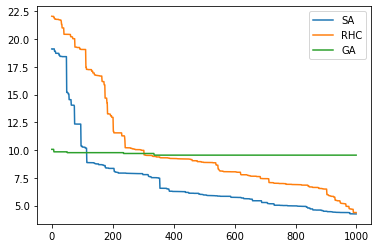

In [391]:
plt.plot(np.arange(len(a1.fitness_curve)),(a1.fitness_curve))
plt.plot(np.arange(len(a2.fitness_curve)),(a2.fitness_curve))
plt.plot(np.arange(len(a.fitness_curve)),(a.fitness_curve))
plt.legend(['SA','RHC','GA'])

## Tuning of the optimizers

In [274]:
Temp = [50,20,10,5,1]
decay = [0.8,0.5,0.2,0.01]
Pop_size = [50]
p_mut=[0.2]
num_restarts = [1,2,5]

In [ ]:
SA_dict = {}
for T in Temp:
    for dec in decay:
        L = []
        Timer = time.time()
        sa = mlrose.NeuralNetwork([20],schedule=mlrose.ExpDecay(T, dec),early_stopping=True,algorithm='simulated_annealing',max_iters=1000, max_attempts= 100, curve = True)
        sa.fit(X1_train,y1_train)
        L.append(accuracy_score(sa.predict(X1_train),y1_train))
        L.append(accuracy_score(sa.predict(X1_test),y1_test))
        L.append(f1_score(sa.predict(X1_train),y1_train))
        L.append(f1_score(sa.predict(X1_test),y1_test))
        L.append(len(sa.fitness_curve))
        L.append(time.time()-Timer)
        SA_dict[(T,dec)] = L
        

In [247]:
SA_dict

{(50, 0.8): [0.6803455723542117,
  0.6982758620689655,
  0.26732673267326734,
  0.18604651162790697,
  1000,
  2.7536728382110596],
 (50, 0.5): [0.6868250539956804,
  0.7586206896551724,
  0.09937888198757766,
  0.125,
  1000,
  2.71618914604187],
 (50, 0.2): [0.7084233261339092,
  0.7413793103448276,
  0.0,
  0.0,
  1000,
  3.025524854660034],
 (50, 0.01): [0.6047516198704104,
  0.6637931034482759,
  0.25306122448979596,
  0.2040816326530612,
  1000,
  3.4937469959259033],
 (20, 0.8): [0.7084233261339092,
  0.7413793103448276,
  0.0,
  0.0,
  1000,
  3.808279275894165],
 (20, 0.5): [0.6954643628509719,
  0.6982758620689655,
  0.45977011494252873,
  0.4262295081967213,
  1000,
  2.8654420375823975],
 (20, 0.2): [0.6760259179265659,
  0.6379310344827587,
  0.4186046511627907,
  0.3636363636363636,
  1000,
  2.5925421714782715],
 (20, 0.01): [0.7084233261339092,
  0.7327586206896551,
  0.0,
  0.0,
  1000,
  2.7996573448181152],
 (10, 0.8): [0.2915766738660907,
  0.25862068965517243,
  0.

In [252]:
RHC_dict = {}
for R in num_restarts:
        L = []
        Timer = time.time()
        rhc = mlrose.NeuralNetwork([20],early_stopping=True,algorithm='random_hill_climb', restarts=R,max_iters=1000, max_attempts= 100, curve = True)
        rhc.fit(X1_train,y1_train)
        L.append(time.time()-Timer)
        L.append(accuracy_score(rhc.predict(X1_train),y1_train))
        L.append(accuracy_score(rhc.predict(X1_test),y1_test))
        L.append(f1_score(rhc.predict(X1_train),y1_train))
        L.append(f1_score(rhc.predict(X1_test),y1_test))
        L.append(len(rhc.fitness_curve))
       
        RHC_dict[R] = L

In [253]:
RHC_dict

{1: [0.4125795364379883,
  0.2915766738660907,
  0.25862068965517243,
  0.451505016722408,
  0.4109589041095891,
  120],
 2: [6.094553470611572,
  0.652267818574514,
  0.5775862068965517,
  0.3263598326359832,
  0.22222222222222224,
  1000],
 5: [12.536479711532593,
  0.6911447084233261,
  0.6810344827586207,
  0.24338624338624337,
  0.13953488372093023,
  1000]}

In [278]:
GA_dict = {}
for p in [0.1,0.2,0.8]:
    for pop in [10,50,100]:
        for M in [100,1000,1000]:
            L = []
            Timer = time.time()
            ga = mlrose.NeuralNetwork([20],early_stopping=True,algorithm='genetic_alg', mutation_prob=p,pop_size=pop,max_iters=M, max_attempts= 10000, curve = True)
            ga.fit(X1_train,y1_train)
            L.append(time.time()-Timer)
            L.append(accuracy_score(ga.predict(X1_train),y1_train))
            L.append(accuracy_score(ga.predict(X1_test),y1_test))
            L.append(f1_score(ga.predict(X1_train),y1_train))
            L.append(f1_score(ga.predict(X1_test),y1_test))
            L.append(len(ga.fitness_curve))
       
            GA_dict[(pop,p,M)] = L

In [279]:
GA_dict

{(10, 0.1, 100): [2.5167224407196045,
  0.7084233261339092,
  0.7413793103448276,
  0.0,
  0.0,
  100],
 (10, 0.1, 1000): [21.145904302597046,
  0.7170626349892009,
  0.7327586206896551,
  0.05755395683453238,
  0.0,
  1000],
 (50, 0.1, 100): [10.112192869186401,
  0.7192224622030238,
  0.7413793103448276,
  0.07142857142857142,
  0.0,
  100],
 (50, 0.1, 1000): [92.41102433204651,
  0.7213822894168467,
  0.7413793103448276,
  0.0851063829787234,
  0.0,
  1000],
 (100, 0.1, 100): [18.462369680404663,
  0.7192224622030238,
  0.7327586206896551,
  0.10958904109589042,
  0.0606060606060606,
  100],
 (100, 0.1, 1000): [186.24603128433228,
  0.7235421166306696,
  0.7413793103448276,
  0.09859154929577466,
  0.0,
  1000],
 (10, 0.2, 100): [2.0732650756835938,
  0.7084233261339092,
  0.7413793103448276,
  0.0,
  0.0,
  100],
 (10, 0.2, 1000): [22.212016582489014,
  0.7192224622030238,
  0.7413793103448276,
  0.07142857142857142,
  0.0,
  1000],
 (50, 0.2, 100): [10.13306450843811,
  0.72138228